In [153]:
import torchvision

In [154]:
!git clone https://github.com/parth1620/Project-NST

fatal: destination path 'Project-NST' already exists and is not an empty directory.


In [155]:
import torch 
from torchvision import models

vgg19 = models.vgg19(pretrained=True)
print(vgg19)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [156]:
vgg19 = vgg19.features
print(vgg19)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [157]:
for parameters in vgg19.parameters():

    parameters.requires_grad_(False)

In [158]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [159]:
print(device)

cuda


In [160]:
vgg19.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [161]:
from PIL import Image
from torchvision import transforms as T 

In [162]:
def preprocess(img_path, max_size=500):
    image = Image.open(img_path).convert('RGB')
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    img_transforms = T.Compose([
        T.Resize(size),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229,0.224,0.225])
    ])   
    image = img_transforms(image)
    image = image.unsqueeze(0) # 3,224,224 -> 1,3,224,224

    return image     

In [163]:
content_p = preprocess('Project-NST/n.jpg')
stype_p = preprocess('Project-NST/style10.jpg')

content_p = content_p.to(device)
style_p = stype_p.to(device)

print(content_p.shape, style_p.shape)

torch.Size([1, 3, 500, 500]) torch.Size([1, 3, 500, 765])


In [164]:
# Deprocessing image 


In [165]:
import numpy as np
import matplotlib.pyplot as plt

In [166]:
def depreprocess(tensor):

    image = tensor.to('cpu').clone()
    image = image.numpy()
    image = image.squeeze(0) # (1,3,224,224) -> (3,224,224)
    image = image.transpose(1,2,0) 
    image = image * np.array([0.229,0.224,0.225]) + np.array([0.485, 0.456, 0.406])
    image = image.clip(0,1)
    return image

In [167]:
content_d = depreprocess(content_p)
style_d = depreprocess(stype_p)

print(content_d.shape, style_d.shape)

(500, 500, 3) (500, 765, 3)


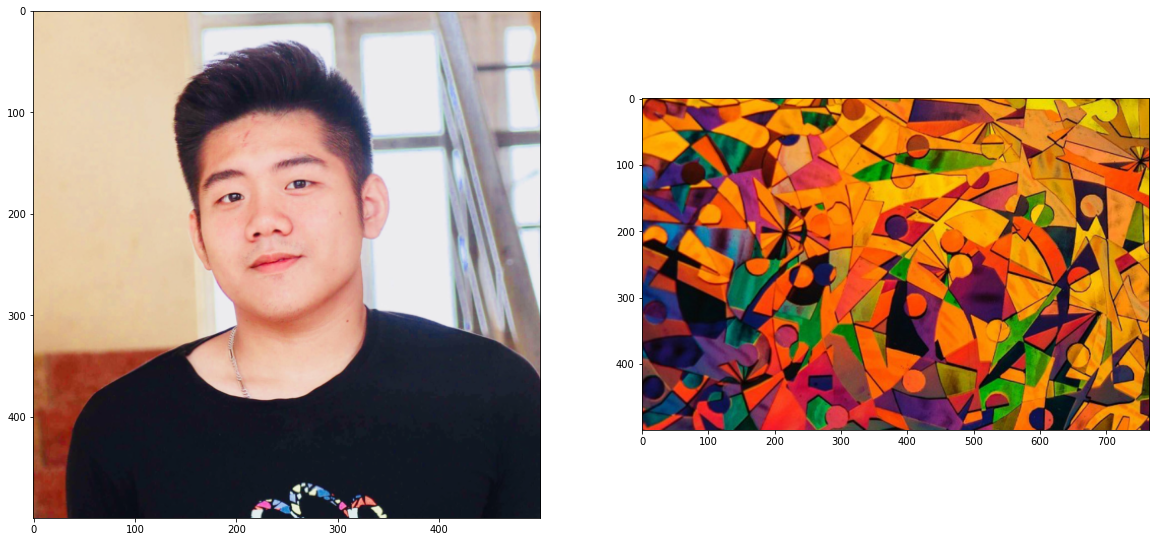

In [168]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
ax1.imshow(content_d)
ax2.imshow(style_d)

In [169]:
#Get content, style features and create gram matrix

In [170]:
def get_features(image, model):

    layers = {
        '0' :'conv1_1',
        '5' : 'conv2_1',
        '10' :'conv3_1',
        '19' :'conv4_1',
        '21' :'conv4_2', # content ft
        '28' :'conv5_1'
    }
    Features = {}
    x = image 
    for name, layer in model._modules.items():
        x = x.to(device)
        x = layer(x)
        if name in layers:
            Features[layers[name]] = x 
    return Features       

In [171]:
content_f = get_features(content_p, vgg19)
style_f = get_features(stype_p,vgg19)


In [172]:
def gram_matrix(tensor):
    b,c,h,w = tensor.size()
    tensor = tensor.view(c,h*w)
    gram = torch.mm(tensor,tensor.t())
    return gram

In [173]:
style_grams = {layer: gram_matrix(style_f[layer]) for layer in style_f}

In [174]:
def content_loss(target_conv4_2, content_conv4_2):
    loss = torch.mean((target_conv4_2 -content_conv4_2)**2)
    return loss

In [175]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2
}

In [176]:
def style_loss(style_weights, target_features, style_grams):
    loss = 0 
    for layer in style_weights:
        target_f = target_features[layer]
        target_gram = gram_matrix(target_f)
        style_gram = style_grams[layer]
        b,c,h,w = target_f.shape
        layer_loss = style_weights[layer] * torch.mean((target_gram- style_gram) **2) 
        loss += layer_loss/ (c*h*w)
    return loss    

In [177]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg19)
print(content_loss(target_f['conv4_2'], content_f['conv4_2']))
print(style_loss(style_weights,target_f,style_grams))

tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
tensor(3189.1035, device='cuda:0', grad_fn=<AddBackward0>)


In [178]:
from torch import optim 
optimizer = optim.Adam([target], lr=0.003)
alpha =1
beta = 1e5
epochs = 3000
show_every = 500

In [179]:
def total_loss(c_loss,s_loss,alpha,beta):
    loss = alpha * c_loss + beta *s_loss
    return loss

In [180]:
results = []
for i in range(epochs):
    target_f = get_features(target, vgg19)
    c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
    s_loss = style_loss(style_weights, target_f, style_grams)
    t_loss = total_loss(c_loss,s_loss, alpha, beta)
    optimizer.zero_grad()
    t_loss.backward()
    optimizer.step()

    if i % show_every ==0:
        print("Total Loss ar Epoch {}: {}".format(i,t_loss))
        results.append(depreprocess(target.detach()))

Total Loss ar Epoch 0: 318910336.0
Total Loss ar Epoch 500: 62957024.0
Total Loss ar Epoch 1000: 24431112.0
Total Loss ar Epoch 1500: 11560911.0
Total Loss ar Epoch 2000: 7128352.5
Total Loss ar Epoch 2500: 4792154.5


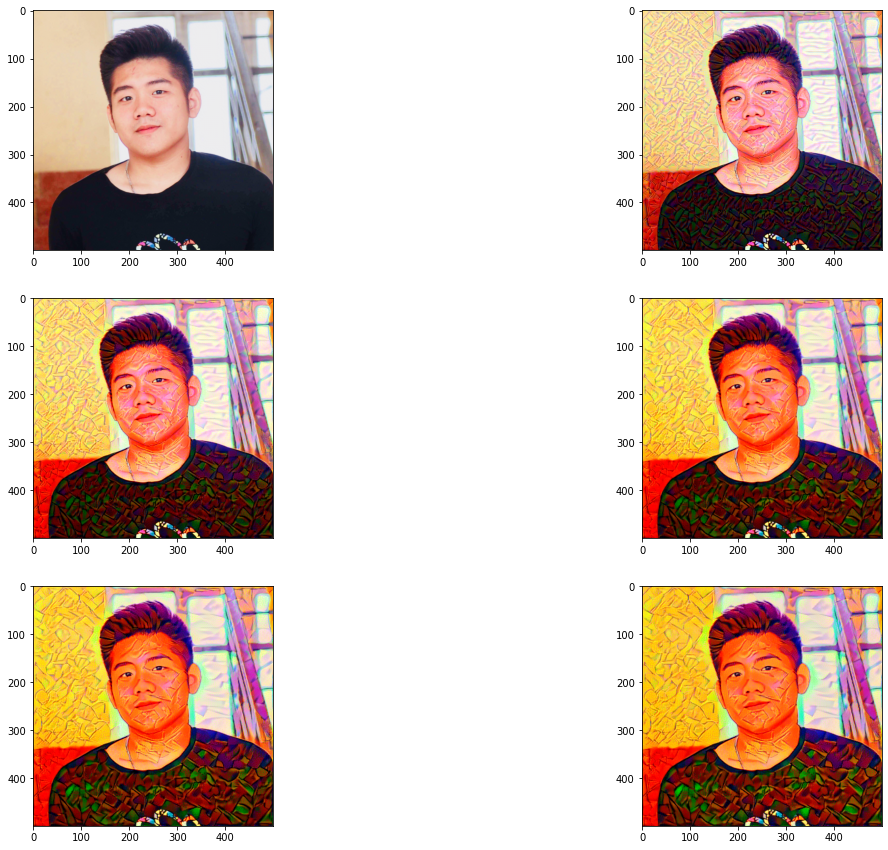

In [184]:
plt.figure(figsize= (20,15))

for i in range(len(results)):
    plt.subplot(3,2,i+1)
    plt.imshow(results[i])
plt.show()    